In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Récupéré depuis Kaggle, dataset des volumes d'importations du gaz en Europe au mois de Janvier 2023, pour les 10 sources géographiques principales

In [4]:
gas = pd.read_csv("euro_gas_imports.csv")

In [5]:
gas

,dates,Norway,Algeria,LNG,Russia,Azerbaijan,UK net flows,Nord Stream,Ukraine Gas Transit,"Yamal (BY,PL)",Turkstream
0,2022-12-30,249,110,351,73,36,60,0,40,0,28
1,2022-12-31,242,107,335,75,36,57,0,38,0,31
2,2023-01-01,243,89,324,69,36,52,0,38,0,26
3,2023-01-02,239,80,348,68,36,56,0,38,0,25
4,2023-01-03,248,80,362,69,36,65,0,38,0,26
5,2023-01-04,242,83,367,66,36,64,0,34,0,26
6,2023-01-05,246,75,344,66,34,73,0,34,0,26
7,2023-01-06,252,79,339,66,34,73,0,31,0,27
8,2023-01-07,245,80,323,64,34,51,0,31,0,24
9,2023-01-08,244,79,311,63,34,50,0,30,0,25


# Problématiques à étudier: 
## - Quelles sont les volumes et tendances par source d'approvisionnement ?
## - Quelle tendance sur les volume totaux ?

In [88]:
countries = variables[0][1::]
countries

['Norway',
 'Algeria',
 'LNG',
 'Russia',
 'Azerbaijan',
 'UK net flows',
 'Nord Stream',
 'Ukraine Gas Transit',
 'Yamal (BY,PL)',
 'Turkstream']

In [6]:
gastotal = gas.sum(axis=1)

/tmp/ipykernel_25379/1445958067.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  gastotal = gas.sum(axis=1)


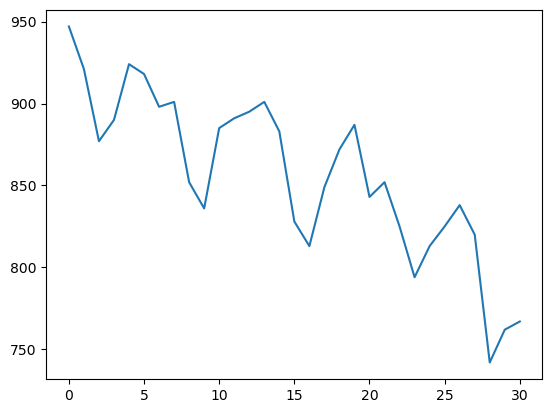

In [7]:
sns.lineplot(data=gastotal)

plt.show()

# Le volume des importations totales de gaz sont en baisse en Europe

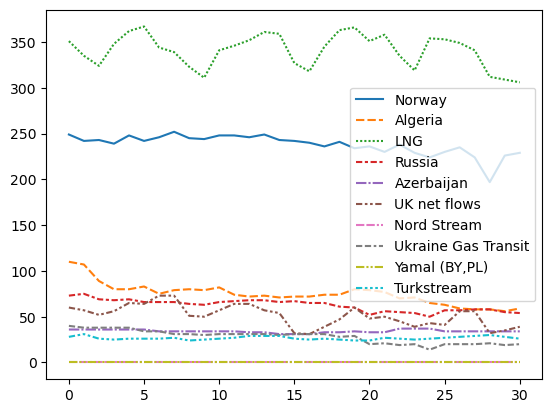

In [8]:
sns.lineplot(data=gas)

plt.show()

# Les importations provenant des bateaux à GNL (LNG) et de Norvège dominent

## A étudier: La tendance parmi les zones d'importation secondaire...

In [9]:
DeleteList=['Norway','LNG']
secondary_gas = gas.drop(DeleteList, axis=1)

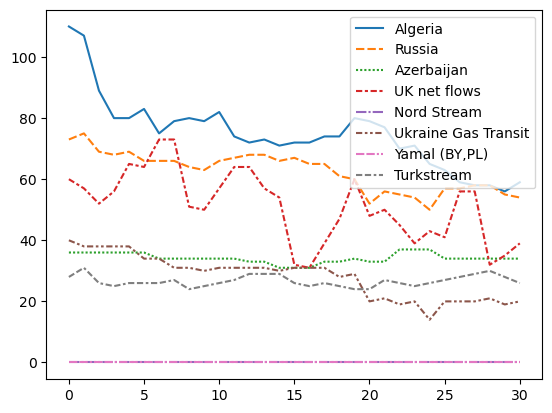

In [10]:
sns.lineplot(data=secondary_gas)

plt.show()

## L'Algérie est le 3ème fourniseur, néanmoins en baisse pour égaliser en fin de mois la Russie qui demeure fournisseur (Hors Yamal et Nord Stream à zéro). 
## Le Royaume-Uni suit en 5ème position.  
## Stables: l'Azerbaidjan 6ème et le Turkestream (Turquie) 7ème. 
## L'Ukraine est en baisse de moitié sur ce mois de janvier.

In [64]:
all_countries_gas_total = gas.sum(axis=0)
all_countries_gas_total = all_countries_gas_total[1::]

In [66]:
all_countries_gas_total = all_countries_gas_total.sort_values(ascending=False)

all_countries_gas_total = all_countries_gas_total[:-2]

all_countries_gas_total

LNG                    10569
Norway                  7375
Algeria                 2321
Russia                  1938
UK net flows            1590
Azerbaijan              1060
Ukraine Gas Transit      870
Turkstream               826
dtype: object

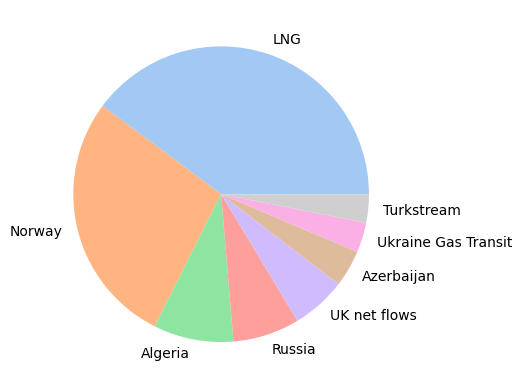

In [67]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:10]

#create pie chart
plt.pie(all_countries_gas_total, labels = all_countries_gas_total.index, colors = colors)
plt.show()

## Nouvelle problématique: Classement des sources par volatilité (instabilité de l'approvisionnement ?) dans les imports

In [68]:
gas.describe()

,Norway,Algeria,LNG,Russia,Azerbaijan,UK net flows,Nord Stream,Ukraine Gas Transit,"Yamal (BY,PL)",Turkstream
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.0,31.000000,31.0,31.000000
mean,237.903226,74.870968,340.935484,62.516129,34.193548,51.290323,0.0,28.064516,0.0,26.645161
std,10.958573,12.241301,18.187790,6.412857,1.661713,11.633840,0.0,7.178373,0.0,1.799044
min,197.000000,56.000000,306.000000,50.000000,31.000000,31.000000,0.0,14.000000,0.0,24.000000
25%,232.000000,70.500000,325.500000,57.000000,33.000000,42.000000,0.0,20.000000,0.0,25.500000
50%,241.000000,74.000000,345.000000,65.000000,34.000000,52.000000,0.0,31.000000,0.0,26.000000
75%,245.500000,80.000000,353.500000,67.000000,36.000000,58.500000,0.0,31.000000,0.0,28.000000
max,252.000000,110.000000,367.000000,75.000000,37.000000,73.000000,0.0,40.000000,0.0,31.000000


In [87]:
# Mettre en forme std(variance) du describe

#Pour un pays
volativity_algeria = gas.Algeria.std()

#Pour tous les pays
volativity_all = gas.loc[1:].std()

volativity_all = volativity_all.sort_values(ascending=False)[:-2]

volativity_all

/tmp/ipykernel_25379/999212068.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  volativity_all = gas.loc[1:].std()


LNG                    18.400900
UK net flows           11.717950
Norway                 10.947314
Algeria                10.537781
Ukraine Gas Transit     6.944774
Russia                  6.215017
Turkstream              1.811838
Azerbaijan              1.655364
dtype: float64

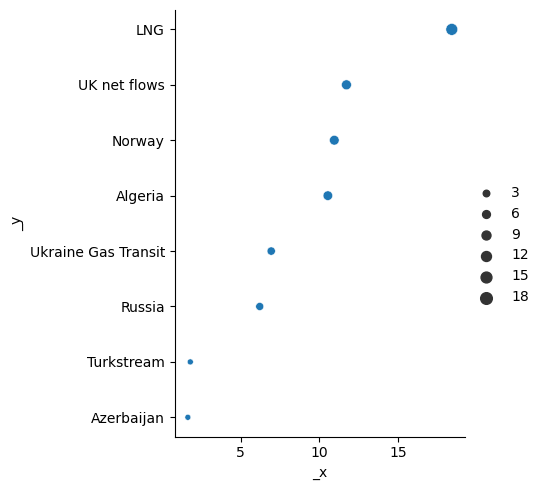

In [109]:
#Graph de la volatilité

sns.relplot(data=volativity_all,x=volativity_all.values, y=volativity_all.index, size=volativity_all.values,palette=colors)

plt.show()

In [102]:
type(colors)

list